## Import Libraries that we need 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data load

In [49]:
df = pd.read_csv('/content/drive/My Drive/machine learning/regression/data/house_rental_data.csv.txt')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


height and age are feature column and tagert column is weight                     
before doing this we are check data is not missing 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [51]:
df =df.drop(columns=['Unnamed: 0'])

In [52]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [53]:
print(X)

[[1.177698e+03 2.000000e+00 7.000000e+00 2.000000e+00 2.000000e+00
  2.000000e+00]
 [2.134800e+03 5.000000e+00 7.000000e+00 4.000000e+00 2.000000e+00
  2.000000e+00]
 [1.138560e+03 5.000000e+00 7.000000e+00 2.000000e+00 2.000000e+00
  1.000000e+00]
 ...
 [7.400640e+02 1.300000e+01 1.400000e+01 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.707840e+03 3.000000e+00 1.400000e+01 3.000000e+00 2.000000e+00
  2.000000e+00]
 [1.376946e+03 6.000000e+00 7.000000e+00 3.000000e+00 2.000000e+00
  1.000000e+00]]


In [54]:
y

array([ 62000,  78000,  58000,  45000,  45000, 148000,  58000,  48000,
        45000,  65000,  31000,  29002,  39000,  48000,  55000, 100000,
        48000,  25000,  90000,  33000, 140000, 100000,  55000, 105000,
       200000,  98000, 200000, 145000,  25000,  24028,  65000,  85000,
        55000,  57000,  46000,  52000,  43500,  60000, 200000,  36000,
       145000,  48000,  36000,  65000,  70000,  50000,  47999,  80000,
       200000,  24030,  76000,  70000,  32500,  30032, 180000,  80000,
        36000,  36000,  29032,  43000,  30000,  32000,  45000,  49000,
        27500,  23000,  33500,  26000,  27500,  50000,  25000,  41000,
        90000,  26000,  38000,  75000,  56000,  40000,  89900,  37000,
        48800,  39000,  45000,  50000,  45000,  46000, 130000,  60000,
        78000,  70000,  70000,  70000,  49800,  79999,  60000,  57000,
        66000,  75000,  55000,  70000,  75000,  60000,  95000, 150000,
       150000,  98000,  80000,  33000,  55000,  80000,  52000,  52000,
      

##Train test split of data

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =42)

## Model

In [100]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

##Train the model and score check

In [101]:
linear_reg.fit(X_train,y_train)
linear_reg.score(X_test,y_test)

0.7202087278032021

In [102]:
y_pred = linear_reg.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred,))

401487570.46258783
13545.889261601767


Here we see the score of the model

we are use the standarization in the data or minmaxscalar

In [103]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [104]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [105]:
X_train

array([[0.20517799, 0.23809524, 0.11428571, 0.33333333, 0.33333333,
        0.25      ],
       [0.08996764, 0.23809524, 0.11428571, 0.16666667, 0.33333333,
        0.        ],
       [0.14174757, 0.14285714, 0.05714286, 0.33333333, 0.66666667,
        0.25      ],
       ...,
       [0.18317152, 0.14285714, 0.22857143, 0.5       , 0.66666667,
        0.25      ],
       [0.48220065, 0.14285714, 0.22857143, 0.33333333, 0.66666667,
        0.25      ],
       [0.46925566, 0.04761905, 0.62857143, 0.5       , 0.66666667,
        0.25      ]])

In [106]:
linear_reg.fit(X_train,y_train)
linear_reg.score(X_test,y_test)

0.7202087278032017


# Lasso regression

import libraries

In [107]:
from sklearn.linear_model import Lasso

In [127]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)

0.7201145246058238

In [109]:
# alpha value change
lasso_reg = Lasso(alpha=5)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)

0.7197327577706178

In [110]:
lasso_reg = Lasso(alpha=100)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)

0.7122856135299128

In [129]:
lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)

0.7202082755623962

In [130]:
y_pred = lasso_reg.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

401488219.4072851
13545.902807979544


# Ridge Regression

In [112]:
from sklearn.linear_model import  Ridge

In [113]:
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train,y_train)
ridge_regression.score(X_test,y_test)

0.697549472484178

In [125]:
ridge_regression = Ridge(alpha=0.05)
ridge_regression.fit(X_train,y_train)
ridge_regression.score(X_test,y_test)

0.7192033479491275

In [115]:
ridge_regression = Ridge(alpha=100)
ridge_regression.fit(X_train,y_train)
ridge_regression.score(X_test,y_test)

0.23272005107699492

In [126]:
y_pred = ridge_regression.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

402930244.18087476
13563.721494443245


# Elastic Net

In [117]:
from sklearn.linear_model import ElasticNet

In [134]:
elasticnet_reg = ElasticNet(alpha=0.00000000005)
elasticnet_reg.fit(X_train,y_train)
elasticnet_reg.score(X_test,y_test)

0.720208727547849

In [119]:
elasticnet_reg = ElasticNet(alpha=100)
elasticnet_reg.fit(X_train,y_train)
elasticnet_reg.score(X_test,y_test)

-0.0025074730049396976

In [135]:
y_pred = elasticnet_reg.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

401487570.8290078
13545.889265760894


In [121]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

# plot graph

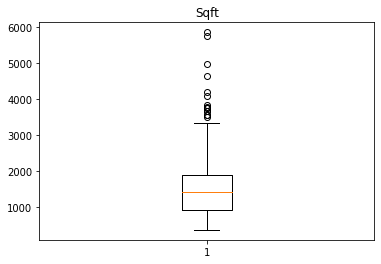

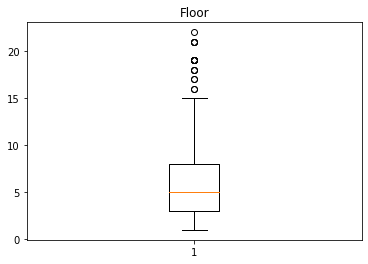

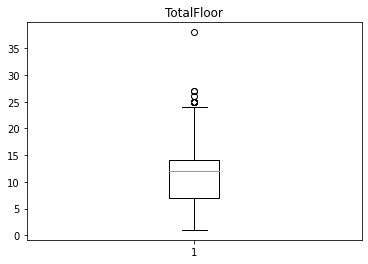

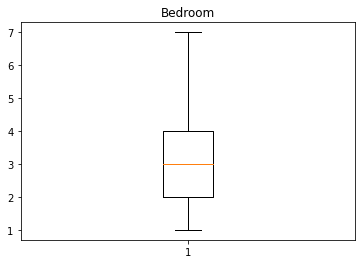

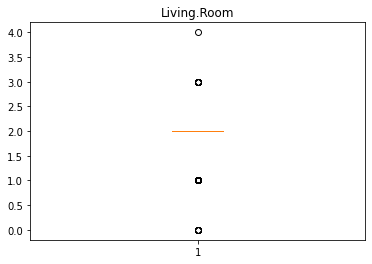

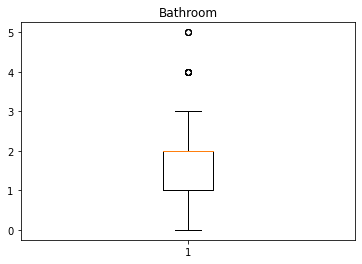

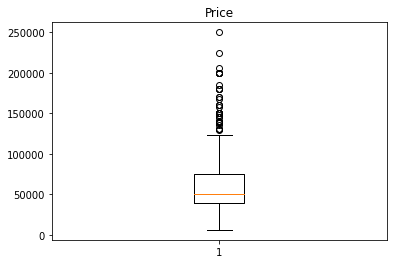

In [122]:
for i,name in enumerate(df.columns):
  data = df.iloc[:,i].values

  plt.boxplot(data)
  plt.title(name)
  plt.show()

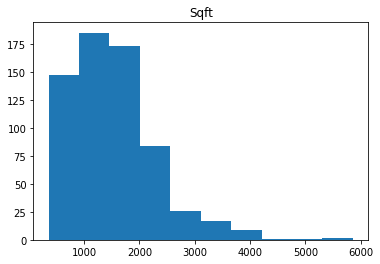

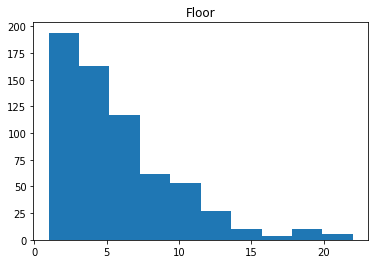

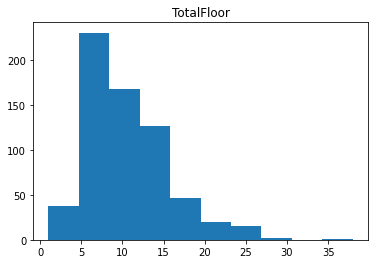

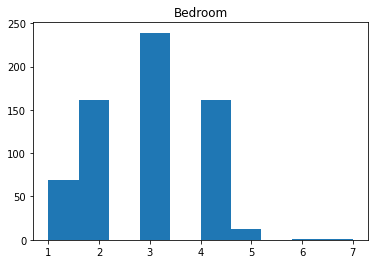

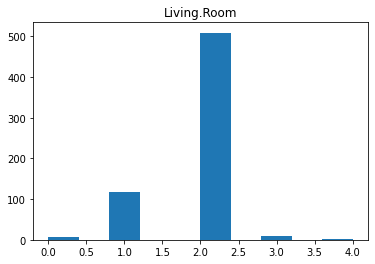

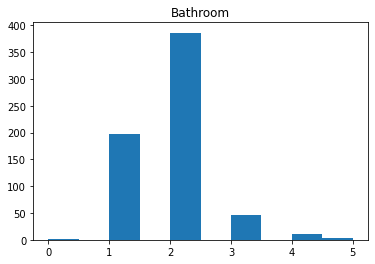

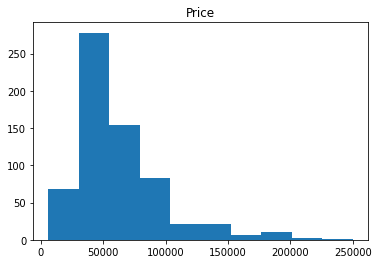

In [123]:
for i,name in enumerate(df.columns):
  data = df.iloc[:,i].values

  plt.hist(data)
  plt.title(name)
  plt.show()

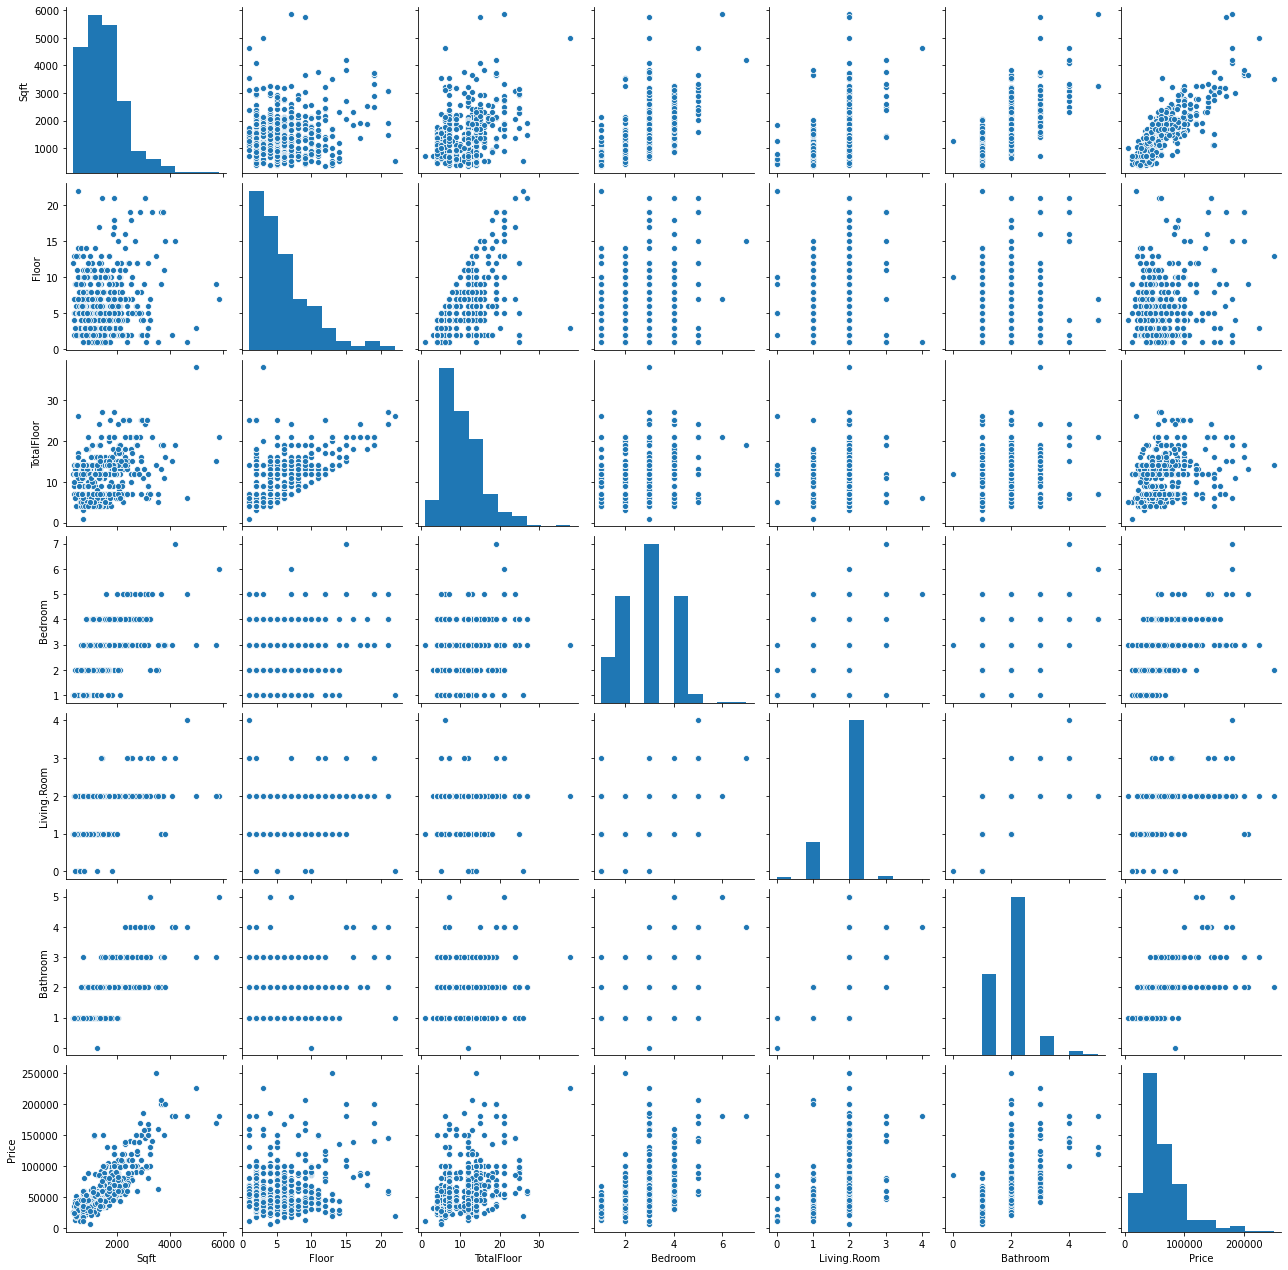

In [124]:
import seaborn as sns
sns.pairplot(df)